<a href="https://colab.research.google.com/github/franciscoklaus/Machine_Learning/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 47)

dados = pd.read_csv("/content/2015-building-energy-benchmarking.csv")

In [4]:
dados.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [5]:
# Descobrir tipo de dado de cada variável
dados.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [11]:
# Fazer conversão de tipo
dados['DataYear'] = dados['DataYear'].astype(float)

In [12]:
dados.dtypes

OSEBuildingID                                                      int64
DataYear                                                         float64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [19]:
# Dados missing (nan)
# Exercicio
    # Calcular o percentual de dados faltantes por coluna
    # Pegar a coluna ENERGYSTARScore todos os dados que estiverem faltando e gerar a mediana

dados_faltantes_percentual = (dados.isnull().sum() / len(dados['OSEBuildingID'])) * 100
print(dados_faltantes_percentual)

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [21]:
# Dados missing (nan)
# Exercicio
    # Pegar a coluna ENERGYSTARScore todos os dados que estiverem faltando e gerar a mediana

# Calcule a mediana da coluna escolhida
mediana_coluna = dados['ENERGYSTARScore'].median()

# Substitua os valores faltantes pela mediana na coluna escolhida
dados['ENERGYSTARScore'].fillna(mediana_coluna, inplace=True)

# Fazer tudo em uma linha apenas
dados['ENERGYSTARScore'] = dados['ENERGYSTARScore'].fillna(dados['ENERGYSTARScore'].median())

In [22]:
dados_faltantes_percentual = (dados.isnull().sum() / len(dados['OSEBuildingID'])) * 100
print(dados_faltantes_percentual)

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [ ]:
# Fórmula para calcular a correlação
# Link para entendimento -> https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

In [25]:
# Exemplo utilizado para demonstração
pd.set_option('display.width', 320)
diabetes = pd.read_csv('/content/pima-indians-diabetes.csv')
print(diabetes.corr(method="pearson"))

                          Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age   Outcome
Pregnancies                  1.000000  0.129459       0.141282      -0.081672 -0.073535  0.017683                 -0.033523  0.544341  0.221898
Glucose                      0.129459  1.000000       0.152590       0.057328  0.331357  0.221071                  0.137337  0.263514  0.466581
BloodPressure                0.141282  0.152590       1.000000       0.207371  0.088933  0.281805                  0.041265  0.239528  0.065068
SkinThickness               -0.081672  0.057328       0.207371       1.000000  0.436783  0.392573                  0.183928 -0.113970  0.074752
Insulin                     -0.073535  0.331357       0.088933       0.436783  1.000000  0.197859                  0.185071 -0.042163  0.130548
BMI                          0.017683  0.221071       0.281805       0.392573  0.197859  1.000000                  0.140647  0.036242  0

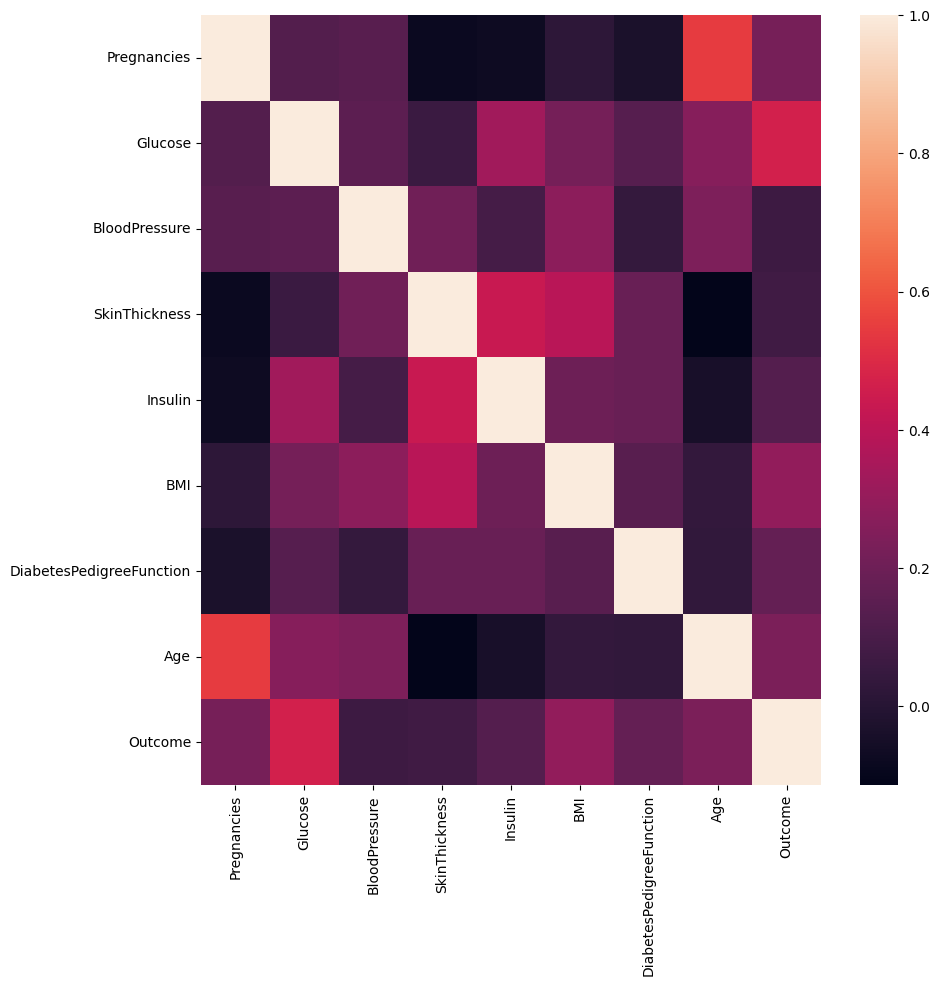

In [32]:
# Criando mapa de calor para visualizar a correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(diabetes.corr())
plt.show()

In [34]:
# Utilizando o dataset de energia
pd.set_option('display.width',500)
print(dados.corr(method='pearson'))

                                                    OSEBuildingID  DataYear  CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  \
OSEBuildingID                                            1.000000       NaN            -0.092519   0.134578          -0.000676       -0.113519         -0.268611           -0.179414               -0.261334                  -0.252482                        -0.223600                       -0.180031         0.062113         -0.148349           -0.135939           -0.175447             -0.164757            -0.233614              -0.227312       -0.068027         -0.267634          -0.267634   
DataYear    

<ipython-input-34-45a8cd77d27d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dados.corr(method='pearson'))


<ipython-input-36-edf3dce8cf87>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


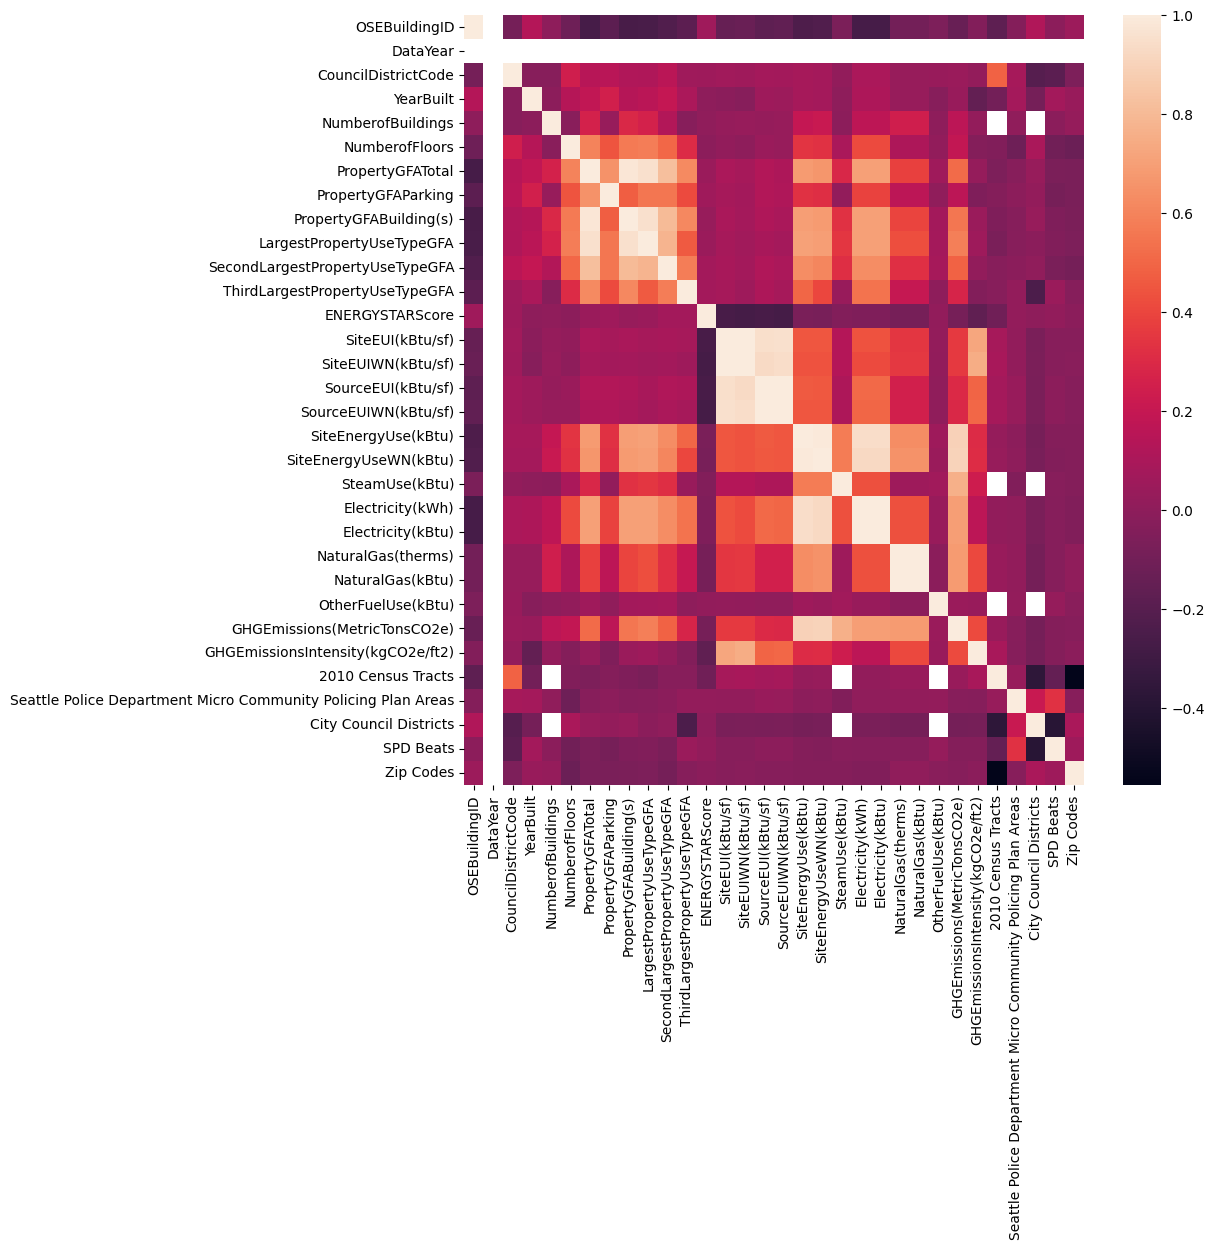

In [36]:
# Gerando o mapa de calor do dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(dados.corr())
plt.show()